In [1]:
# Sample API
import flowx
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

Re   = 100.0
dt   = 0.01
tmax = 10.

# Define cell-centered variable names
center_vars = ['pres', 'divv', 'asol', 'eror']
face_vars   = ['velc', 'hvar', 'asol', 'eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 1.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}


# Create the grid and data
gridc = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = flowx.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = flowx.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

scalars = flowx.Scalars(tmax=10.0, dt=0.01, Re=100.0)

In [3]:
ins_vars = ['velc', 'hvar', 'divv', 'pres']

while scalars.var['time'] <= scalars.var['tmax']:
    
    # Predictor Step
    flowx.ins.euler(gridc, gridx, gridy, scalars, ins_vars, 'predictor')
    
    # Solve the pressure Poisson equation 
    scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_jacobi(gridc, 'pres', 'divv',
                                                                       maxiter=10000, tol=1e-9)
    
    # Corrector Step
    flowx.ins.euler(gridc, gridx, gridy, scalars, ins_vars, 'corrector')
    
    # Display stats
    if scalars.var['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars.var['time'], scalars.stats)   

    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : 8298
Final poisson residual : 9.999017012083382e-10
Max, Min, U   : 2.0, -0.06368603696318668
Max, Min, V   : 0.15978098482935374, -0.15978098482935374
Max, Min, P   : 1.821370116487896, -1.821370116487896
Max, Min, DIV : 8.822232144822806e-08, -8.822232144822806e-08


------------ Time = 0.09999999999999999 ---------------
Number of poisson iterations    : 5427
Final poisson residual : 9.986693430805327e-10
Max, Min, U   : 2.0, -0.13534631828869778
Max, Min, V   : 0.3062757792420776, -0.31416379318957555
Max, Min, P   : 1.1784764920745354, -0.870387187021241
Max, Min, DIV : 9.131347233903853e-08, -9.123620848877287e-08


------------ Time = 0.20000000000000004 ---------------
Number of poisson iterations    : 4721
Final poisson residual : 9.9872680125128e-10
Max, Min, U   : 2.0, -0.15408003056231664
Max, Min, V   : 0.3200511957643647, -0.37180322360235246
Max, Min, P   : 1.1785200206184425, -0.7890553227470622
M

KeyboardInterrupt: 

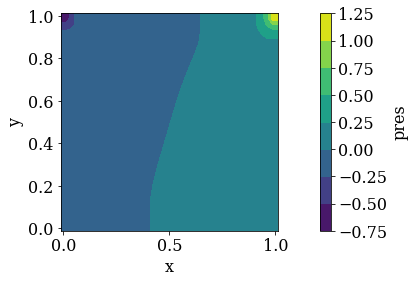

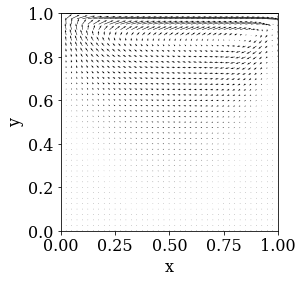

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_vector(gridx,gridy,'velc')